En el siguiente notebook se muestra algunos procesos realizados para conocer el Índice de Calidad del Aire (AQI, por sus siglas en inglés) para los datos de 2019, así como el cálculo de las métricas de rendimiento y la elaboración de gráficos.

In [1]:
#Lectura de los paquetes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df= pd.read_csv('https://raw.githubusercontent.com/IrvingC48/Prototype_BEDU/main/datasets/test_2019_resultado.csv')

In [5]:
df.head()

,date,PM2_5,RH,TMP,WSP,dia_semana_sin,juliano_sin,dia_semana_cos,juliano_cos,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,pred_NN,indice_real,AQI_real,indice_pred,AQI_pred,zone,id_station
0,2019-01-01,12.190476,58.190476,6.647619,1.600000,0.781831,0.017166,0.623490,0.999853,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,14.967581,51.190,Regular,57.031,Regular,SO,INN
1,2019-01-01,39.619048,46.523810,14.366667,1.314286,0.781831,0.017166,0.623490,0.999853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,30.767232,111.142,Mala,90.257,Regular,NO,TLA
2,2019-01-02,30.315789,50.105263,14.168421,1.257895,0.974928,0.034328,-0.222521,0.999411,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,29.383028,89.308,Regular,87.346,Regular,CE,BJU
3,2019-01-02,29.368421,49.210526,14.331579,1.421053,0.974928,0.034328,-0.222521,0.999411,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,29.334552,87.316,Regular,87.244,Regular,CE,HGM
4,2019-01-02,8.227273,57.863636,5.600000,1.772727,0.974928,0.034328,-0.222521,0.999411,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.892686,34.280,Buena,52.667,Regular,SO,INN


In [6]:
df= df.set_index('date')

#Cálculo de indicadores

Se realizan los siguientes datos para las métricas propuestas:


*   Error absoluto entre la concentración de $PM_{2.5}$ real y predicha por el modelo.
*   La precisión del modelo para estimar el AQI de cada estimación.
*  Si el error fue estimar un índice superior (falso negativo, representado con valores negativos) o un índice inferior (Falso positivo, representado con valores positivos)



In [7]:
#Error absoluto 
df['error_abs']= abs(df['PM2_5']-df['pred_NN'])

In [8]:
#Precisión
df['accuracy']= df['AQI_real']==df['AQI_pred']

In [9]:
#MAE del modelo
df.error_abs.mean()

4.630570105025111

In [10]:
#Precisión del modelo
sum(df.accuracy)/df.error_abs.size

0.8360817941952506

In [11]:
df.AQI_real.unique()

array(['Regular', 'Mala', 'Buena'], dtype=object)

In [12]:
df.AQI_pred.unique()

array(['Regular', 'Mala', 'Buena'], dtype=object)

In [13]:
#Función para otorgar un valor numérico al error
def Num_AQI(CP):
    i = 0

    if CP=="Mala":
        i = 2
    if CP=="Regular":
        i = 1
    if CP=="Buena":
        i = 0
    return i

In [14]:
#Aplicarlo al dataset
df['NumAQI_real'] = df.AQI_real.apply(Num_AQI)
df['NumAQI_pred'] = df.AQI_pred.apply(Num_AQI)


In [15]:
#Determinar la dirección
df['Dir_error']=df['NumAQI_real']-df['NumAQI_pred']

In [16]:
#Calcular el porcentaje de falsos negativos y falsos postivos
df.Dir_error.value_counts()/df.Dir_error.size

 0    0.836082
-1    0.102573
 1    0.061346
Name: Dir_error, dtype: float64

Se hace una pequeña revisión de las métricas por zonas

In [17]:
#Error medio absoluto (MAE) por zona
df.groupby(['zone']).error_abs.mean()

zone
CE    5.184164
NE    4.688562
NO    4.568473
SE    4.441420
SO    4.169103
Name: error_abs, dtype: float64

In [18]:
#Error medio absoluto por zona y por estación
df.groupby(['zone','id_station']).error_abs.mean()

zone  id_station
CE    BJU           4.475427
      HGM           5.717343
      MER           5.177113
NE    GAM           4.498086
      MON           4.151021
      NEZ           5.286445
      SAG           4.858958
      XAL           4.808461
NO    MGH           4.544384
      TLA           4.585068
SE    UAX           4.441420
SO    AJM           4.079680
      INN           4.183737
      PED           4.217267
      SFE           4.197816
Name: error_abs, dtype: float64

In [19]:
#Número de datos por zona y por estación
df.groupby(['zone','id_station']).size()

zone  id_station
CE    BJU           146
      HGM           198
      MER           297
NE    GAM           279
      MON           281
      NEZ           265
      SAG           113
      XAL           221
NO    MGH           124
      TLA           180
SE    UAX            92
SO    AJM           236
      INN           106
      PED           276
      SFE           218
dtype: int64

In [20]:
#Porcentaje de datos correctos e incorrectos por zona y por estación
df.groupby(['zone','id_station']).accuracy.value_counts()/df.groupby(['zone','id_station']).accuracy.size()

zone  id_station  accuracy
CE    BJU         True        0.808219
                  False       0.191781
      HGM         True        0.797980
                  False       0.202020
      MER         True        0.865320
                  False       0.134680
NE    GAM         True        0.842294
                  False       0.157706
      MON         True        0.854093
                  False       0.145907
      NEZ         True        0.796226
                  False       0.203774
      SAG         True        0.920354
                  False       0.079646
      XAL         True        0.800905
                  False       0.199095
NO    MGH         True        0.911290
                  False       0.088710
      TLA         True        0.944444
                  False       0.055556
SE    UAX         True        0.989130
                  False       0.010870
SO    AJM         True        0.851695
                  False       0.148305
      INN         True        0.65094

In [21]:
#Valores correctos e incorrectos por zona
df.groupby(['zone']).accuracy.value_counts()/df.groupby('zone').accuracy.size()

zone  accuracy
CE    True        0.831513
      False       0.168487
NE    True        0.834340
      False       0.165660
NO    True        0.930921
      False       0.069079
SE    True        0.989130
      False       0.010870
SO    True        0.790670
      False       0.209330
Name: accuracy, dtype: float64

In [22]:
#Porcentaje de la dirección de los errores por zona y por estación
df.groupby(['zone','id_station']).Dir_error.value_counts()/df.groupby(['zone','id_station']).Dir_error.size()

zone  id_station  Dir_error
CE    BJU          0           0.808219
                  -1           0.178082
                   1           0.013699
      HGM          0           0.797980
                   1           0.141414
                  -1           0.060606
      MER          0           0.865320
                  -1           0.070707
                   1           0.063973
NE    GAM          0           0.842294
                  -1           0.100358
                   1           0.057348
      MON          0           0.854093
                  -1           0.085409
                   1           0.060498
      NEZ          0           0.796226
                   1           0.128302
                  -1           0.075472
      SAG          0           0.920354
                   1           0.070796
                  -1           0.008850
      XAL          0           0.800905
                   1           0.122172
                  -1           0.076923
NO    MGH   

In [23]:
#Porcentaje de la dirección de los errores por zona
df.groupby('zone').Dir_error.value_counts()/df.groupby('zone').Dir_error.size()

zone  Dir_error
CE     0           0.831513
      -1           0.092044
       1           0.076443
NE     0           0.834340
       1           0.088007
      -1           0.077653
NO     0           0.930921
       1           0.036184
      -1           0.032895
SE     0           0.989130
      -1           0.010870
SO     0           0.790670
      -1           0.180622
       1           0.028708
Name: Dir_error, dtype: float64

Después de observar las métricas anteriores, se consideró que la estación MON sería un ejemplo que pudiera mostrar más claramente el rendimiento del modelo a manera de ejemplo, considerando el número de datos con el que cuenta y que sus valores de rendimiento son similares a los promedio del modelo.

In [24]:
df_MON= df[df.id_station=="MON"]

In [25]:
df_MON.head(10)

,PM2_5,RH,TMP,WSP,dia_semana_sin,juliano_sin,dia_semana_cos,juliano_cos,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,pred_NN,indice_real,AQI_real,indice_pred,AQI_pred,zone,id_station,error_abs,accuracy,NumAQI_real,NumAQI_pred,Dir_error
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-02,23.476190,56.238095,12.457143,2.352381,0.974928,0.034328,-0.222521,0.999411,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,16.470783,74.924,Regular,60.192,Regular,NE,MON,7.005407,True,1,1,0
2019-01-03,22.000000,46.875000,12.670833,1.741667,0.433884,0.051479,-0.900969,0.998674,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,21.884976,71.820,Regular,71.578,Regular,NE,MON,0.115024,True,1,1,0
2019-01-04,23.700000,46.150000,15.080000,1.745000,-0.433884,0.068615,-0.900969,0.997643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,23.250391,75.395,Regular,74.449,Regular,NE,MON,0.449609,True,1,1,0
2019-01-05,34.500000,52.550000,15.210000,1.250000,-0.974928,0.085731,-0.222521,0.996318,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,27.462346,98.107,Regular,83.307,Regular,NE,MON,7.037654,True,1,1,0
2019-01-06,26.695652,48.826087,15.669565,1.526087,-0.781831,0.102821,0.623490,0.994700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,23.840759,81.695,Regular,75.691,Regular,NE,MON,2.854893,True,1,1,0
2019-01-07,22.523810,46.000000,15.400000,2.447619,0.000000,0.119881,1.000000,0.992788,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,15.869579,72.921,Regular,58.927,Regular,NE,MON,6.654230,True,1,1,0
2019-01-08,20.166667,35.444444,13.783333,1.388889,0.781831,0.136906,0.623490,0.990584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,26.670396,67.964,Regular,81.642,Regular,NE,MON,6.503729,True,1,1,0
2019-01-09,28.222222,50.722222,12.961111,1.494444,0.974928,0.153891,-0.222521,0.988088,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,25.336861,84.905,Regular,78.837,Regular,NE,MON,2.885361,True,1,1,0
2019-01-10,22.083333,60.833333,13.841667,1.812500,0.433884,0.170830,-0.900969,0.985301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,20.425737,71.995,Regular,68.509,Regular,NE,MON,1.657596,True,1,1,0


#Gráficas

En el siguiente apartado se muestra la realización de las gráficas de la serie de tiempo para la estación MON

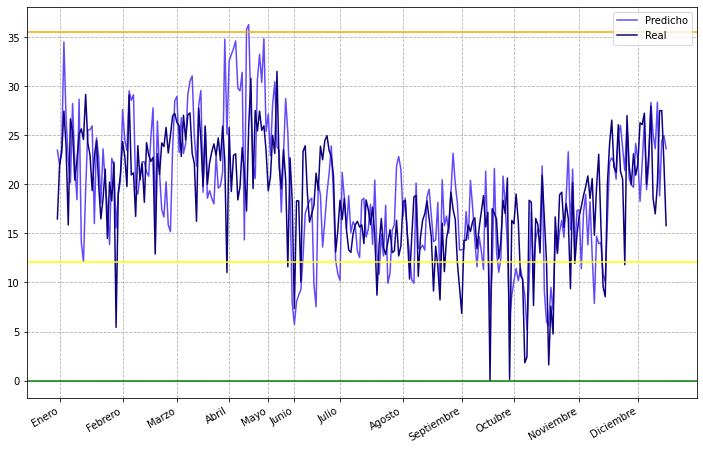

In [26]:

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(df_MON['PM2_5'], color= "#6349fc", label = "Predicho")
ax.plot(df_MON['pred_NN'], color= "#0d017f", label = "Real")
# format the ticks

ax.set_xticklabels(['Enero', 'Febrero','Marzo', 'Abril','Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre','Octubre', 'Noviembre', 'Diciembre'])
# round to nearest years.
ax.set_xticks([1,30,55,79,97,109,130,159,186,210,240,267])


# format the coords message box
ax.grid(True)
plt.axhline(y=0.0, color= "green")
plt.axhline(y=12.1, color= "yellow")
plt.axhline(y=35.5, color= "orange")


# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()
plt.grid(which='major',linestyle="--",linewidth='0.8')

plt.legend()
plt.show()

In [ ]:
#Para exportar el gráfico
from google.colab import files
fig.savefig("GraficaMO.png", bbox_inches = 'tight')
files.download("GraficaMO.png") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ahora se realiza un gráfico para conocer la clasificación de la calidad del aire que se obtuvo en la realidad y con la predicción del modelo, para los datos de esta estación en 2019

In [27]:
df_calidad_MON=pd.DataFrame(df_MON[['AQI_real','AQI_pred']].stack(level=0))

In [28]:
df_calidad_MON.to_csv('Datos_MON.csv')

In [29]:
df_calidad_MON=pd.read_csv('/content/Datos_MON.csv')

In [30]:
df_calidad_MON.head()

,date,Unnamed: 1,0
0,2019-01-02,AQI_real,Regular
1,2019-01-02,AQI_pred,Regular
2,2019-01-03,AQI_real,Regular
3,2019-01-03,AQI_pred,Regular
4,2019-01-04,AQI_real,Regular


In [31]:
df_calidad_MON= df_calidad_MON.set_index('date')

In [32]:
#Cambiar el nombre de las variables para que los yticklabel se coloquen correctamente
df_calidad_MON[['Unnamed: 1']]= df_calidad_MON[['Unnamed: 1']].replace('AQI_pred', 'AQI predicha')
df_calidad_MON[['Unnamed: 1']]= df_calidad_MON[['Unnamed: 1']].replace('AQI_real', 'AQI real')

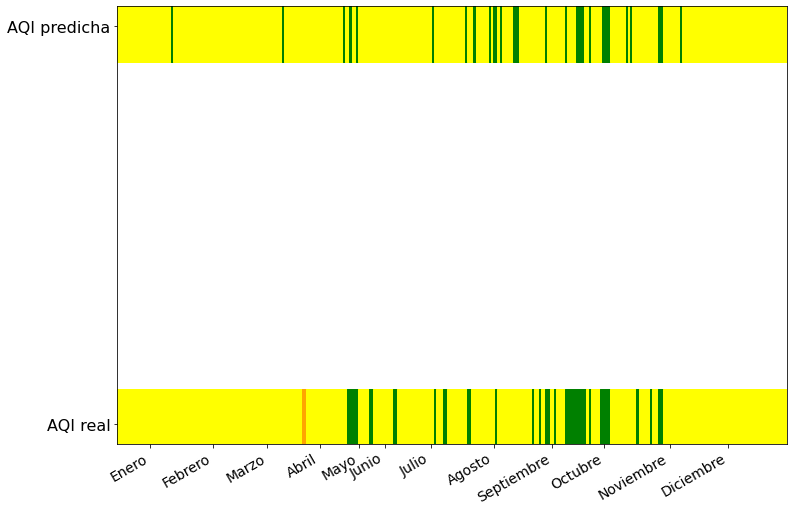

In [33]:
fig, ax = plt.subplots(figsize=(12, 16))
#Definir la escala de colores de acuerdo con la normatividad de calidad del aire
colors = {'Buena':'green', 'Regular':'yellow', 'Mala':'orange'}

ax.scatter(df_calidad_MON.index,df_calidad_MON['Unnamed: 1'], c=df_calidad_MON['0'].map(colors), s= 5000, marker= "s")
#Realizar los segmentos de acuerdo con los meses de las mediciones
ax.set_xticklabels(['Enero', 'Febrero','Marzo', 'Abril','Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre','Octubre', 'Noviembre', 'Diciembre'], fontsize= 14)
# round to nearest years.
ax.set_xticks([1,30,55,79,97,109,130,159,186,210,240,267])
fig.autofmt_xdate(0.5)
plt.setp(ax.get_yticklabels(), fontsize=16)
plt.show()


In [ ]:
from google.colab import files
fig.savefig("GraficaCalor.png", bbox_inches = 'tight')
files.download("GraficaCalor.png") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>